 ## Title Heart Disease Predmiction  
 'Author :' [Waseem Hassan ] (https://github.com/Waseem771/Project_ML) \
 'Kagle account: '  [''Waseem Hassan] (https://www.kaggle.com/waseem7711) \  
 'Date :' 09-3-2024  \
 'Data Set:' ['Heart Disease UCI'] (https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) 

## Meta Data 

## About Dataset
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
### Column Descriptions:
`id` (Unique id for each patient) \
`age` (Age of the patient in years) \
`origin` (place of study) \
`sex` (Male/Female) \
`cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]) \
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)) \ 
`chol` (serum cholesterol in mg/dl) \
`fbs` (if fasting blood sugar > 120 mg/dl) \
`restecg` (resting electrocardiographic results) \
`-- Values:` [normal, stt abnormality, lv hypertrophy] \
### thalach: maximum heart rate achieved
`exang:` exercise-induced angina (True/ False) \
`oldpeak:` ST depression induced by exercise relative to rest \
`'slope:`' the slope of the peak exercise ST segment \
`ca:` number of major vessels (0-3) colored by fluoroscopy \
`thal:` [normal; fixed defect; reversible defect] \
`num: `the predicted attribute 
Acknowledgements
#### Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
##### Relevant Papers:
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aim and Objects 
We will fill this after perform the exploratory data analysis and visuilization data.

In [1]:
### Lets Import the all the libraries 

## To handle the data 

import pandas as pd 
import numpy as np 
## to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
## To pre-process the data 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
## Import the iterative imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# for classification tasks 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
## metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## ignore warnings 
import warnings
warnings.filterwarnings('ignore')


## Load the data set 

In [2]:
## way_1 

# load the data set from csv file placed locally in our pc 

df = pd.read_csv('D:\\Data Science & AI Mentorship Program\\six-months_python_for_data_science-mentorship-program-main\\07_machine_learning\\Projects_ML\\01_Project_ML_Heart_Disease\\heart_disease_uci.csv')


In [3]:
##  Look five rows of the data

df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory the Data Analysis (EDA)

### Explore each column 


In [4]:
# exploring the datatype of each column 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
##  data shape 

df.shape

(920, 16)

In [6]:
# id columns
df['age'].min(), df['age'].max()


(28, 77)

<Axes: xlabel='age', ylabel='Count'>

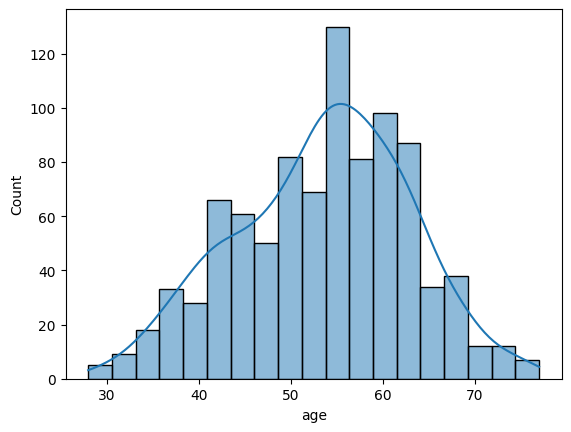

In [ ]:
# draw the distribution of histogram for the age column
sns.histplot(df['age'], kde=True)


Mean: 53.51086956521739
Median: 54.0
Mode: 54


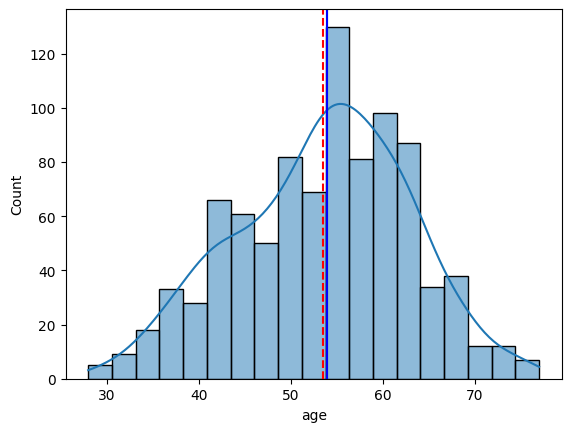

In [ ]:
# plot the mean, median , mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='r', linestyle='--')
plt.axvline(df['age'].median(), color='g', linestyle='-')
plt.axvline(df['age'].mode()[0], color='b', linestyle='-')


# print the values of mean, median, mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])



In [ ]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [10]:
## lets explore of histogram of age column by using  gender based distribution using plotly and coloring the heart disease by sex 


fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()




In [11]:
# find the values count the  age column grouping by sex column 
df['age'].value_counts()

age
54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: count, dtype: int64

In [14]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [15]:
# find the values of sex columns 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [19]:
## Percentages of male and female of the heart disease effected patients 
male_count = 726
female_count = 194
total_count = male_count + female_count
male_percentage = (male_count / (total_count)) * 100
female_percentage = (female_count / (total_count)) * 100

##  display the results

print(f"Male percentage of patients: {male_percentage:.2f}")
print(f"Female percentage of patients: {female_percentage:.2f}")


Male percentage of patients: 78.91
Female percentage of patients: 21.09


In [21]:
df['dataset'] .value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

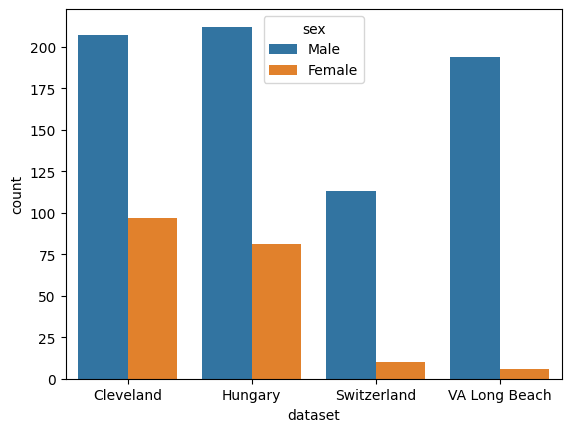

In [23]:
# plot the countplot of dataset column 
sns.countplot(data=df, x='dataset', hue='sex')

In [29]:
# Convert 'dataset' column to string type
df['dataset'] = df['dataset'].astype(str)

# Plot the bar plot
fig = px.bar(df, x='dataset', color='sex')
fig.show()

In [30]:
# print the values count from dataset column groupby sex 
print(df.groupby('sex')['dataset'].value_counts())

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


####  Outputs: 

1. The minimum age to have a heart disease  starts from 28 years old
2. The maximum age to have a heart disease is 77 years old
3. Most of the males and females are in heart disease with the age of 54-55 years old.
4. Female percentage in the data : 21.91%
5. Male percentage of peoples in data set is 78.09%
6.Male are 274.23 % more than females in data.
7. We have highest number of peoples from cleveland (304), and lowest from switzerlan (123)
    1. The number of highest number of females in data set from cleveland is 97 and lowest from VA long beach 6
    2. 
    



